# Golf Handicap Tracker

### Data Creation

##### This notebook will be used to generate synthetic data and lay the groundwork for how real data will be stored and updated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

%matplotlib inline
pd.set_option("display.max_rows", None)

import warnings

warnings.filterwarnings("ignore")

import inspect

In [2]:
from utils import add_round, generate_data, get_handicaps, fill_handicaps, plot_statistics, histplot, pie_chart, dist_plot, \
rolling_avg, scatter, mean_med_stats, find_round, handicap_differentials, total_profit, profit_by_match_type

<hr style="border: 3px solid blue">

# Data Generation

In [31]:
df = pd.DataFrame(columns=["name", "date", "adj_gross_score", "course_rating", "slope_rating", "handicap_diff",
                           "putts", "3_putts", "fairways_hit", "gir", "penalty/ob", "birdies", "trpl_bogeys_plus", 
                           "profit/loss", "match_format", "golf_course", "opponent/s", "notes"])

In [32]:
df.head()

Empty DataFrame
Columns: [name, date, adj_gross_score, course_rating, slope_rating, handicap_diff, putts, 3_putts, fairways_hit, gir, penalty/ob, birdies, trpl_bogeys_plus, profit/loss, match_format, golf_course, opponent/s, notes]
Index: []

In [33]:
# Testing Function

df.loc[len(df)] = add_round(name="Dave", date="2024-07-22", adj_gross_score=80, course_rating=72, slope_rating=113, putts=36,
                            three_putts=0, fairways=6, gir=12, penalties=1, birdies=2, trpl_bogeys_plus=1, profit_loss=2.5, 
                            match_format="Skins", golf_course="Hollybrook", opponent_s="Pete", notes="I played well enough to win while Pete played badly",
                            calc_diff=False)
df.shape

(1, 18)

In [34]:
# Inspection
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Dave 2024-07-22               80             72           113   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0            NaN     36        0             6   12           1        2   

   trpl_bogeys_plus  profit/loss match_format golf_course opponent/s  \
0                 1          2.5        Skins  Hollybrook       Pete   

                                               notes  
0  I played well enough to win while Pete played ...

In [35]:
# Generate synthetic data
generate_data(df)
df.shape

(501, 18)

In [36]:
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Dave 2024-07-22               80           72.0           113   
1  Pete 2024-07-27               81           72.0           118   
2  Pete 2024-07-29               79           71.0           124   
3  Pete 2024-08-02               76           72.0           118   
4  Pete 2024-08-02               79           71.5           129   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0            NaN     36        0             6   12           1        2   
1            NaN     33        2             2   15           3        0   
2            NaN     32        2             2   12           3        0   
3            NaN     35        1             2   14           6        0   
4            NaN     40        1             2   13           0        0   

   trpl_bogeys_plus  profit/loss match_format        golf_course opponent/s  \
0                 1          2.5        Skins         Hollybrook       Pete   
1                 2          0.0         Dots         Hollybrook        Doc   
2                 2          2.5         Dots     Bethpage Black       Fred   
3                 0          0.0   Match Play  Whistling Straits       Eric   
4                 1         -0.5        Skins      Kiawah Island       Fred   

                                               notes  
0  I played well enough to win while Pete played ...  
1                                      I got unlucky  
2                              The golf Gods hate me  
3                                      I played well  
4                              The golf Gods hate me

In [37]:
# Generate new column
df["handicap_diff"] = handicap_differentials(df)
df[["name", "date", "handicap_diff"]].head(10)

name       date  handicap_diff
0  Dave 2024-07-22       8.000000
1  Pete 2024-07-27       8.618644
2  Pete 2024-07-29       7.290323
3  Pete 2024-08-02       3.830508
4  Pete 2024-08-02       6.569767
5  Pete 2024-08-08       9.658120
6  Pete 2024-08-11       2.394068
7  Pete 2024-08-14       3.941860
8  Pete 2024-08-10       4.100806
9  Pete 2024-08-12       5.467742

In [38]:
# Populate Handicap Column
df = get_handicaps(df)

In [39]:
# Check group handicaps
df.groupby("name")["handicap"].last()

name
Dave     7.869486
Doc     10.467814
Eric     4.637751
Fred     1.084689
Pete     4.293850
Name: handicap, dtype: float64

In [35]:
# Inspection
print(df.shape)
df.head(10)

(501, 16)


name       date  adj_gross_score  course_rating  slope_rating  \
0    Dave 2024-07-22               80           72.0           113   
401   Doc 2024-07-25               82           73.5           121   
201  Eric 2024-07-25               78           73.0           129   
301  Fred 2024-07-25               87           71.5           123   
101  Dave 2024-07-25               80           71.5           127   
1    Pete 2024-07-25               82           71.0           110   
402   Doc 2024-07-27               79           71.5           114   
202  Eric 2024-07-27               79           71.5           114   
2    Pete 2024-07-28               82           72.5           111   
302  Fred 2024-07-28               83           72.0           113   

     handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0         8.000000     36        0             6   12           1        2   
401       7.938017     24        0             3    5           4        1   
201       4.379845     42        8             5    9           5        0   
301      14.239837     40        0             4   14           2        0   
101       7.562992     48        0             5   11           6        0   
1        11.300000     28        0             8   11          11        0   
402       7.434211     19        0             5    7           2        0   
202       7.434211     47        9             4    9           3        0   
2         9.671171     22        0            16   11           7        0   
302      11.000000     46        0             4   15           7        1   

     dbl_bogeys_plus  profit/loss match_format  handicap  
0                  1          2.5        Skins       NaN  
401                0         -1.5        Skins       NaN  
201                0         -0.5  Stroke Play       NaN  
301                0         -1.0   Match Play       NaN  
101                0         -0.5         Dots       NaN  
1                  0          1.0   Match Play       NaN  
402                0          2.5  Stroke Play       NaN  
202                0          5.0  Stroke Play       NaN  
2                  0         -1.0  Stroke Play       NaN  
302                1         -2.5         Dots       NaN

<hr style="border:3px solid blue">

# Demonstration of Plotting Functions 

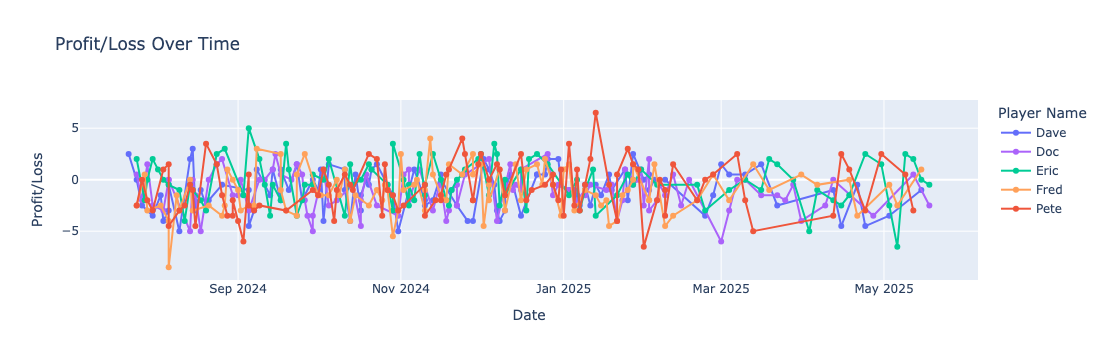

In [13]:
# Plotting handicap over time
plot_statistics(df, 'profit/loss')

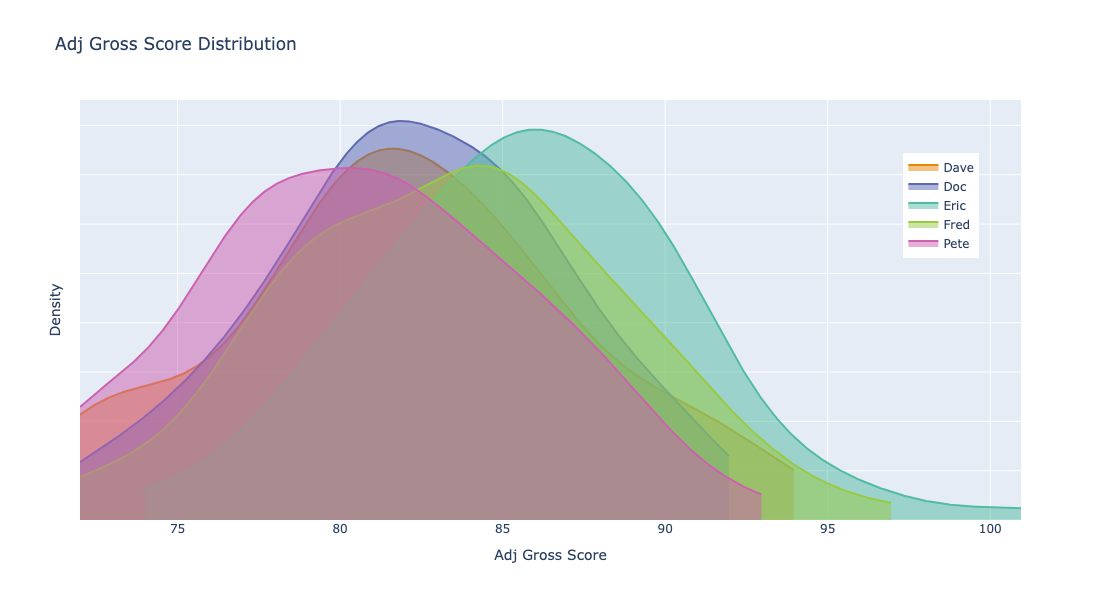

In [14]:
# Plot distributions using KDE
dist_plot(df, "adj_gross_score")

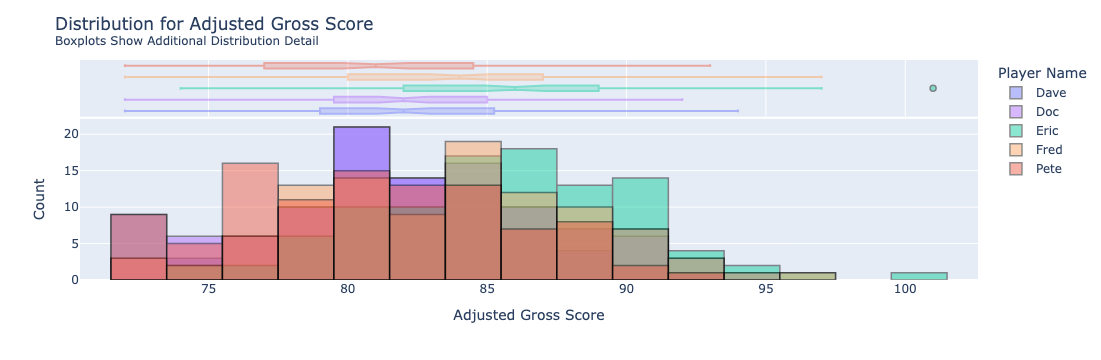

In [15]:
# Plot distributions using histogram with boxplot in the margin
histplot(df, "adj_gross_score")

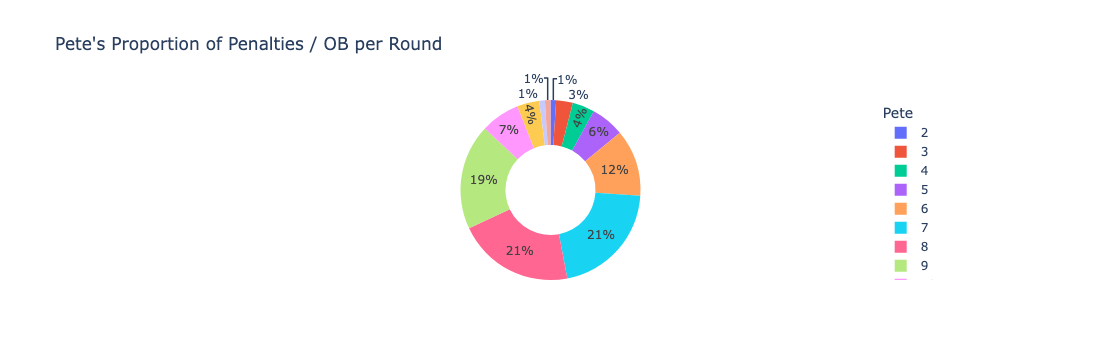

In [16]:
# Example pie chart
pie_chart(df, "penalty/ob", "Pete")

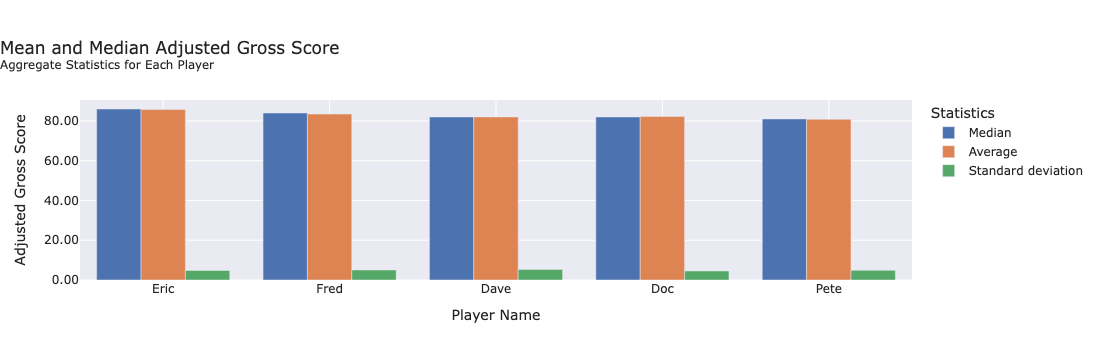

In [17]:
# Aggregate statistics for adjusted gross score
mean_med_stats(df, "adj_gross_score")

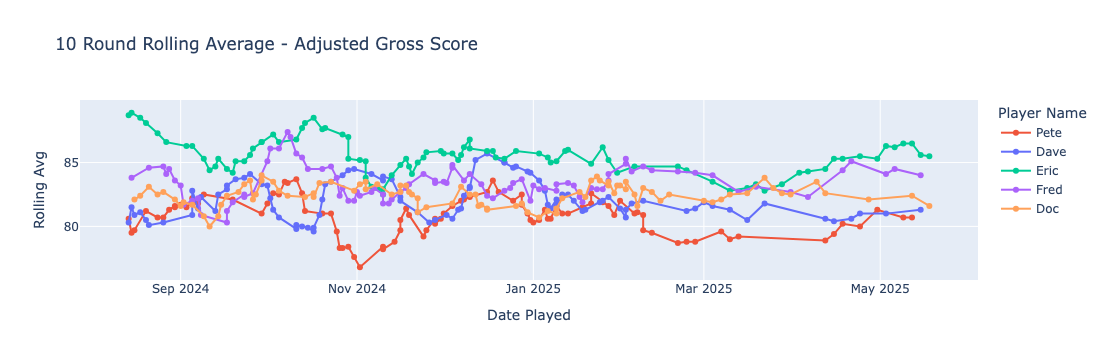

In [18]:
# Plot rolling averages based on specified window
rolling_avg(df, "adj_gross_score", 10)

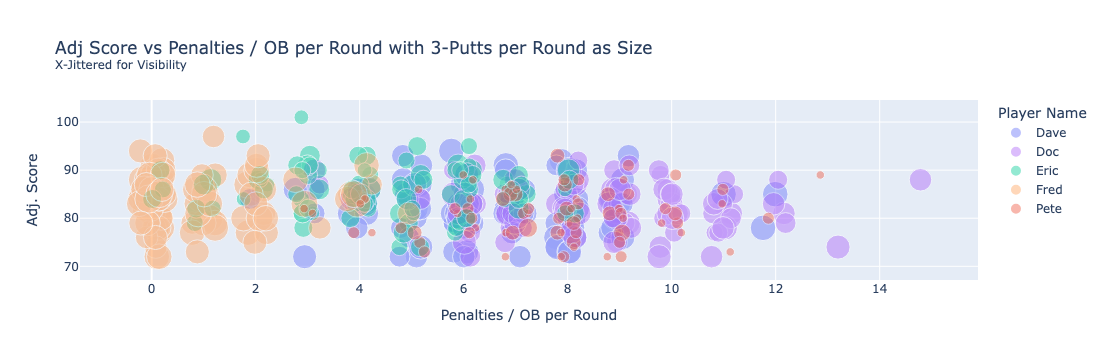

In [19]:
# Scatter plot of adjusted gross score vs penalty strokes with 3-putts as a size variable
scatter(df,"penalty/ob", size="3_putts")

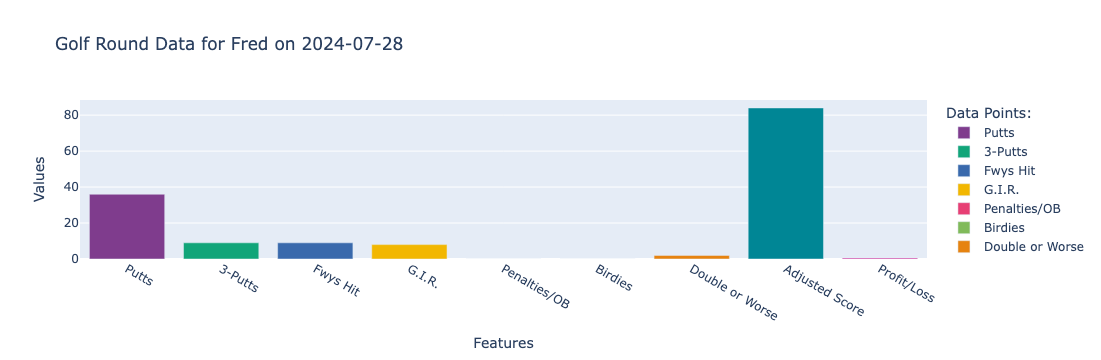

In [22]:
find_round(data=df, date=pd.to_datetime("2024-07-28"), name="Fred")

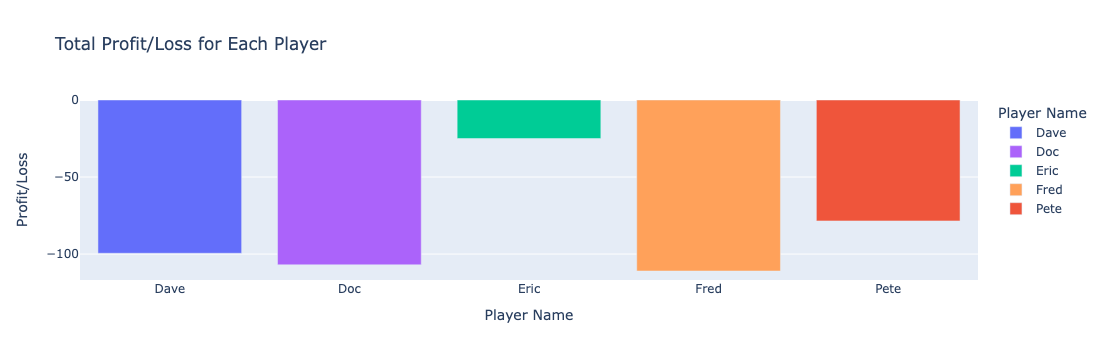

In [23]:
total_profit(df)

In [58]:
df.groupby(["name", "match_format"])["profit/loss"].agg(["mean"]).reset_index()

name match_format      mean
0   Dave         Dots -1.041667
1   Dave   Match Play -0.796296
2   Dave        Skins -1.316667
3   Dave  Stroke Play -0.500000
4    Doc         Dots -0.796296
5    Doc   Match Play -1.420000
6    Doc        Skins -0.620000
7    Doc  Stroke Play -0.695652
8   Eric         Dots  1.105263
9   Eric   Match Play  0.973684
10  Eric        Skins  0.468750
11  Eric  Stroke Play  0.166667
12  Fred         Dots -1.130435
13  Fred   Match Play -1.112903
14  Fred        Skins -1.520000
15  Fred  Stroke Play -0.523810
16  Pete         Dots -0.467742
17  Pete   Match Play -1.060000
18  Pete        Skins -0.058824
19  Pete  Stroke Play -1.000000

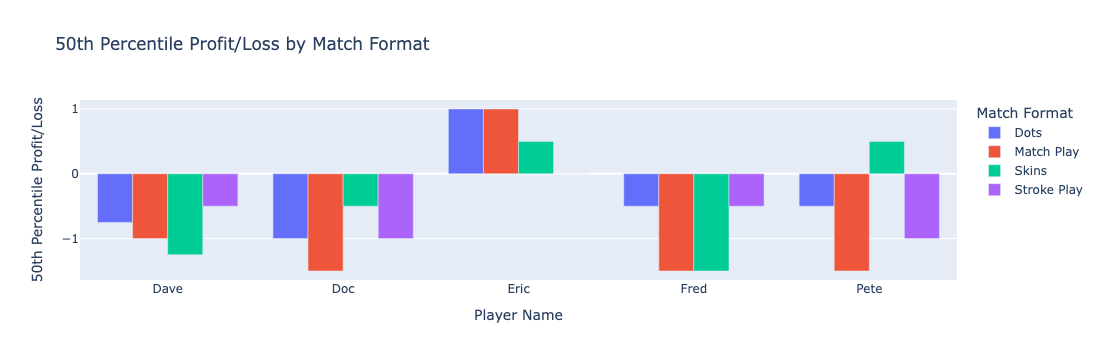

In [77]:
profit_by_match_type(df, "median")

<hr style= "border: 3px solid blue">

# File Serialization

In [32]:
# Save synthetic data
df.to_csv("synthetic_data.csv", index=False)

In [33]:
# Verify save quality 
pd.read_csv("synthetic_data.csv").head(9)

name        date  adj_gross_score  course_rating  slope_rating  \
0  Dave  2024-07-22               80           72.0           113   
1  Eric  2024-07-25               78           71.5           123   
2   Doc  2024-07-25               80           73.5           124   
3  Dave  2024-07-25               75           73.0           115   
4  Fred  2024-07-25               85           71.0           115   
5  Pete  2024-07-25               86           73.0           121   
6  Fred  2024-07-27               83           71.5           116   
7  Dave  2024-07-27               85           73.5           114   
8   Doc  2024-07-28               75           71.5           118   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0       8.000000     36        0             6   12           1        2   
1       5.971545     18        4             2    8           5        0   
2       5.923387     40        7             0   13           7        0   
3       1.965217     40        6             8   11           6        0   
4      13.756522     34        1             0    4           6        0   
5      12.140496     40        0             7    1           0        1   
6      11.202586     29        3             4    3           2        0   
7      11.399123     40        6             4   13           8        2   
8       3.351695     44        9             0   10           3        1   

   dbl_bogeys_plus  profit/loss match_format  handicap  jittered_col  
0                1          2.5        Skins       NaN      0.972945  
1                0         -4.5         Dots       NaN      5.056786  
2                0          0.5        Skins       NaN      7.145442  
3                1          4.5        Skins       NaN      5.928638  
4                0          1.0  Stroke Play       NaN      6.036545  
5                0         -2.0  Stroke Play       NaN      0.243566  
6                3          0.0        Skins       NaN      2.149294  
7                0         -0.5   Match Play -0.113391      7.972625  
8                0          0.5  Stroke Play       NaN      3.004930

In [29]:
# Copied a table from a browser
equitable_df = pd.read_clipboard()

In [31]:
# Save to file
equitable_df.to_csv("ESC.csv", index=False)

In [33]:
# Verify
pd.read_csv("ESC.csv").head()

Course Handicap Maximum Number on Any Hole
0       9 or less               Double Bogey
1   10 through 19                          7
2   20 through 29                          8
3   30 through 39                          9
4      40 or more                         10

In [35]:
# Create an additional table for handicap calculation rules

handicap_rds = pd.DataFrame(columns=["Recorded Rounds", "Differentials to Use", "Adjustment"])

handicap_rds.loc[len(handicap_rds)] =["3", "Lowest 1", -2.0]
handicap_rds.loc[len(handicap_rds)] =["4", "Lowest 1", -1.0]
handicap_rds.loc[len(handicap_rds)] =["5", "Lowest 1", 0]
handicap_rds.loc[len(handicap_rds)] =["6", "Average of lowest 2", -1.0]
handicap_rds.loc[len(handicap_rds)] =["7 or 8", "Average of lowest 2", 0]
handicap_rds.loc[len(handicap_rds)] =["9 to 11", "Average of lowest 3", 0]
handicap_rds.loc[len(handicap_rds)] =["12 to 14", "Average of lowest 4", 0]
handicap_rds.loc[len(handicap_rds)] =["15 or 16", "Average of lowest 5", 0]
handicap_rds.loc[len(handicap_rds)] =["17 or 18", "Average of lowest 6", 0]
handicap_rds.loc[len(handicap_rds)] =["19", "Average of lowest 7", 0]
handicap_rds.loc[len(handicap_rds)] =["20", "Average of lowest 8", 0]

In [37]:
# Save to file
handicap_rds.to_csv("handicap_rds.csv", index=False)

In [34]:
# Verify
pd.read_csv("handicap_rds.csv").head()

Recorded Rounds Differentials to Use  Adjustment
0               3             Lowest 1        -2.0
1               4             Lowest 1        -1.0
2               5             Lowest 1         0.0
3               6  Average of lowest 2        -1.0
4          7 or 8  Average of lowest 2         0.0

<hr style="border: 3px solid blue">

# Real Dataframe Creation

In [77]:
# Create real dataframe
df = pd.DataFrame(columns=["name", "date", "adj_gross_score", "course_rating", "slope_rating", "handicap_diff", \
                           "putts", "3_putts", "fairways_hit", "gir", "penalty/ob", "birdies", "dbl_bogeys_plus", "profit/loss"])

df.to_csv("real_data.csv", index=False)

In [78]:
# cell for adding new data 
df = pd.read_csv("real_data.csv")

df.loc[len(df)] = add_round(name="Dave", date="2024-07-22", adj_gross_score=80, course_rating=72, slope_rating=113, putts=36, \
          three_putts=0, fairways=6, gir=12, penalties=1, birdies=2, dbl_bogeys_plus=1, profit_loss=2.5, match_format="Skins",
                            calc_diff=True)

# Populate Handicap Column
df = get_handicaps(df)

# df.to_csv("real_data.csv", index=False)
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Dave 2024-07-22               80             72           113   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0            8.0     36        0             6   12           1        2   

   dbl_bogeys_plus  profit/loss  handicap  
0                1          2.5       NaN